<a href="https://colab.research.google.com/github/pedroblossbraga/supportvectormachines_tcc/blob/master/TCC_SVC_test_02072022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

- https://towardsdatascience.com/implementing-svm-from-scratch-784e4ad0bc6a
- https://fordcombs.medium.com/svm-from-scratch-step-by-step-in-python-f1e2d5b9c5be

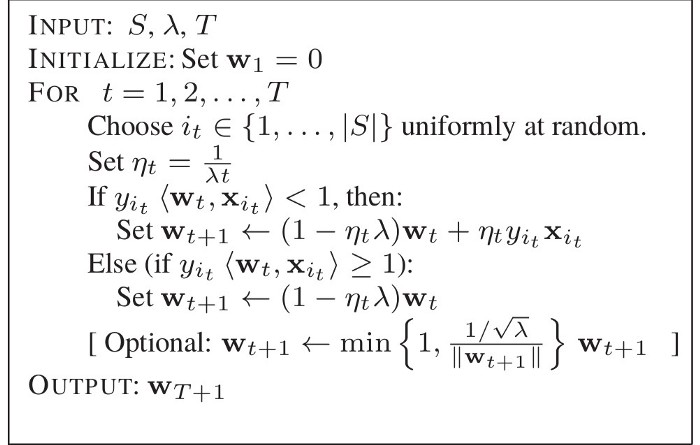

In [ ]:
class SVC_linear:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.eta = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        # \mathbb{I}(y<=0)
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        # y_i (<w, x_i> + b ) >= 1
        linear_model = np.dot(x, self.w) + self.b 
        return self.cls_map[idx] * linear_model >= 1
    
    def _get_gradients(self, constrain, x, idx):
        if constrain:
            dw = self.lambda_param * self.w
            db = 0
            return dw, db
        # dw <- lambda w - <y, x>
        dw = self.lambda_param * self.w - np.dot(self.cls_map[idx], x)
        db = - self.cls_map[idx]
        return dw, db
    
    def _update_weights_bias(self, dw, db):
        # w_{t+1} <-  w - eta (lambda w_t -  <y, x>) =
        #             w - (eta lambda w_t - eta <y, x>) =
        #            (1 - eta lambda )wt + eta <y,x>
        self.w -= self.eta * dw
        self.b -= self.eta * db
    
    def fit(self, X, y):

        # set w_1 = 0
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters): # for t = 1, .., T

            for idx, x in enumerate(X):

                constrain = self._satisfy_constraint(x, idx)
                dw, db = self._get_gradients(constrain, x, idx)
                self._update_weights_bias(dw, db)
    
    def predict(self, X):
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)

In [ ]:
# X, y = datasets.make_blobs(
#     n_samples=250, n_features=2, centers=2, cluster_std=1.05, random_state=1
# )

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=1)

# clf = SVC(n_iters=1000)
# clf.fit(X_train, y_train)
# predictions = clf.predict(X_test)

# def accuracy(y_true, y_pred):
#     accuracy = np.sum(y_true==y_pred) / len(y_true)
#     return accuracy

# print("SVM Accuracy: ", accuracy(y_test, predictions))

In [ ]:
import numpy as np
# from SVM import SVM
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
X, y = datasets.make_blobs(
    n_samples=250, n_features=2, centers=2, cluster_std=1.05, random_state=1
)
X, y

(array([[ -1.46367045,   4.8370441 ],
        [ -0.7508819 ,   1.98987424],
        [ -8.14945082,  -4.01703366],
        [ -9.34481882,  -4.5831433 ],
        [ -8.4637755 ,  -3.33125211],
        [-11.6558266 ,  -4.82340793],
        [-11.61344541,  -4.42363849],
        [ -1.89300446,   4.1956939 ],
        [ -2.36436834,   4.39319204],
        [ -2.94029152,   6.97832695],
        [ -8.84376635,  -4.90006476],
        [-10.10832445,  -3.29164309],
        [  0.03823717,   4.93436779],
        [ -2.02060627,   4.45226657],
        [ -1.78859464,   3.42393196],
        [ -8.47371178,  -4.60228724],
        [ -0.96755762,   2.69767961],
        [ -1.32456886,   4.14465097],
        [ -1.13958802,   4.22305155],
        [ -0.46910199,   3.25160404],
        [ -6.81531254,  -3.08753469],
        [ -9.10176722,  -4.38702932],
        [ -3.05810916,   2.55776688],
        [ -9.45652801,  -5.12396315],
        [  0.63529427,   2.94016872],
        [ -1.34438107,   4.03662753],
        [ -2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

In [ ]:
clf = SVC_linear(n_iters=1000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

print("SVC Accuracy: ", accuracy(y_test, predictions))

SVC Accuracy:  1.0


In [ ]:
# plot results
def get_hyperplane(x, w, b, offset):
    # <w,x> - b 
    return (-w[0] * x - b + offset) / w[1]

In [ ]:
x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)


x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])

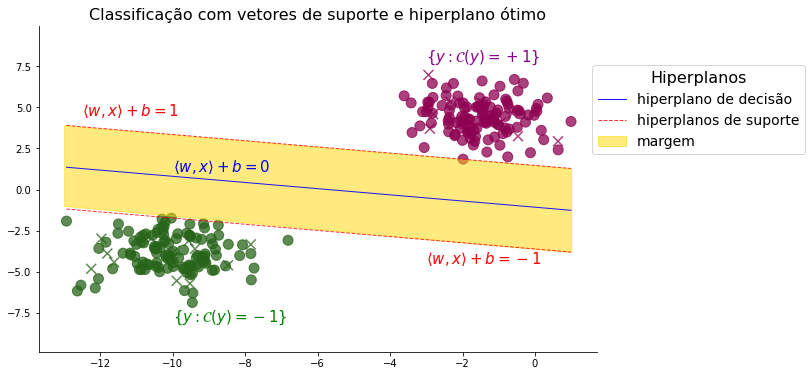

In [ ]:
plt.rcParams['axes.facecolor']='white'

fig, ax = plt.subplots(1, 1, figsize=(10,6))

plt.set_cmap('PiYG')
plt.scatter(X_train[:, 0], X_train[:, 1], 
            marker='o', 
            c=y_train, 
            s=100, 
            alpha=0.75)
plt.scatter(X_test[:, 0], X_test[:, 1], 
            marker="x", 
            c=y_test, 
            s=100, 
            alpha=0.75)


plt.fill_between(
    [-13, 1],
    [x1_1_m, x1_2_m],
    [-x0_2, x1_2_p], 
    color='gold',
    interpolate=False,
    alpha=0.5,
    label='margem'
)


plt.plot(
    [x0_1, x0_2], [x1_1, x1_2],
    linestyle='-',
    # color='k',
    color='blue',
    lw=1,
    alpha=0.9,
    label='hiperplano de decisão'
)
plt.plot(
    [x0_1, x0_2], [x1_1_m, x1_2_m], 
    linestyle="--", 
    # color='grey', 
    color='red',
    lw=1, 
    alpha=0.8,
    # label='upper support hyperplane'
    label='hiperplanos de suporte'
)
plt.plot(
    [x0_1, x0_2], [x1_1_p, x1_2_p], 
    linestyle="--", 
    # color='grey', 
    color='red',
    lw=1, 
    alpha=0.8,
    # label='lower support hyperplane'
)

# plt.scatter(x0_1, x0_2, label=f'x0_1, x0_2: {(x0_1, x0_2)}', marker='x')
# plt.scatter(x1_1, x1_2, label=f'x1_1, x1_2: {(x1_1, x1_2)}', marker='x')
# plt.scatter(x1_1_m, x1_2_m, label=f'x1_1_m, x1_2_m: {(x1_1_m, x1_2_m)}', marker='x')
# plt.scatter(x1_1_p, x1_2_p, label=f'x1_1_p, x1_2_p: {(x1_1_p, x1_2_p)}', marker='x')


ax.set_ylim([x1_min - 3, x1_max + 3])

for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

plt.legend(
           bbox_to_anchor = (0.98, 0.9),
           title='Hiperplanos',
           title_fontsize=16,
           fontsize=14
           )

plt.text(-3, -4.5,
         r'$\langle w, x \rangle + b = - 1$',
         color='red',
         fontsize = 15)
plt.text(-12.5, 4.5,
         r'$\langle w, x \rangle + b = 1$',
         color='red',
         fontsize = 15)
plt.text(-10, 1.1,
         r'$\langle w, x \rangle + b = 0$',
         color='blue',
         fontsize = 15)
plt.text(-10, -8, 
         r'$\{y:\mathcal{C}(y)=-1\}$',
         color='green',
         fontsize = 15)
plt.text(-3, 7.8, 
         r'$\{y:\mathcal{C}(y)=+1\}$',
         color='darkmagenta',
         fontsize = 15)
plt.title('Classificação com vetores de suporte e hiperplano ótimo',
          fontsize = 16)
plt.show()

# Teste com maior desvio

In [ ]:
def test_classification(
                        n_samples=250,
                        n_features=2, 
                        centers=2, 
                        cluster_std=1.05, 
                        random_state=42,
                        title='Classificação com vetores de suporte e hiperplano ótimo'
                        ):
  
  X, y = datasets.make_blobs(
      n_samples=n_samples,
       n_features=n_features, 
       centers=centers, 
       cluster_std=cluster_std, 
       random_state=random_state
  )
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

  clf = SVC_linear(n_iters=1000)
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_test)

  print("SVC Accuracy: ", accuracy(y_test, predictions))

  x0_1 = np.amin(X_train[:, 0])
  x0_2 = np.amax(X_train[:, 0])

  x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
  x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

  x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
  x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

  x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
  x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)


  x1_min = np.amin(X[:, 1])
  x1_max = np.amax(X[:, 1])

  plt.rcParams['axes.facecolor']='white'

  fig, ax = plt.subplots(1, 1, figsize=(10,6))

  plt.set_cmap('PiYG')
  plt.scatter(X_train[:, 0], X_train[:, 1], 
              marker='o', 
              c=y_train, 
              s=100, 
              alpha=0.75)
  plt.scatter(X_test[:, 0], X_test[:, 1], 
              marker="x", 
              c=y_test, 
              s=100, 
              alpha=0.75)


  # plt.fill_between(
  #     [-13, 1],
  #     [x1_1_m, x1_2_m],
  #     [-x0_2, x1_2_p], 
  #     color='gold',
  #     interpolate=False,
  #     alpha=0.5,
  #     label='margem'
  # )


  plt.plot(
      [x0_1, x0_2], [x1_1, x1_2],
      linestyle='-',
      # color='k',
      color='blue',
      lw=1,
      alpha=0.9,
      label='hiperplano de decisão'
  )
  plt.plot(
      [x0_1, x0_2], [x1_1_m, x1_2_m], 
      linestyle="--", 
      # color='grey', 
      color='red',
      lw=1, 
      alpha=0.8,
      # label='upper support hyperplane'
      label='hiperplanos de suporte'
  )
  plt.plot(
      [x0_1, x0_2], [x1_1_p, x1_2_p], 
      linestyle="--", 
      # color='grey', 
      color='red',
      lw=1, 
      alpha=0.8,
      # label='lower support hyperplane'
  )

  # plt.scatter(x0_1, x0_2, label=f'x0_1, x0_2: {(x0_1, x0_2)}', marker='x')
  # plt.scatter(x1_1, x1_2, label=f'x1_1, x1_2: {(x1_1, x1_2)}', marker='x')
  # plt.scatter(x1_1_m, x1_2_m, label=f'x1_1_m, x1_2_m: {(x1_1_m, x1_2_m)}', marker='x')
  # plt.scatter(x1_1_p, x1_2_p, label=f'x1_1_p, x1_2_p: {(x1_1_p, x1_2_p)}', marker='x')


  ax.set_ylim([x1_min - 3, x1_max + 3])

  for spine in ['top','right']:
      ax.spines[spine].set_visible(False)

  plt.legend(
            bbox_to_anchor = (0.98, 0.9),
            title='Hiperplanos',
            title_fontsize=16,
            fontsize=14
            )

  # plt.text(-3, -4.5,
  #         r'$\langle w, x \rangle + b = - 1$',
  #         color='red',
  #         fontsize = 15)
  # plt.text(-12.5, 4.5,
  #         r'$\langle w, x \rangle + b = 1$',
  #         color='red',
  #         fontsize = 15)
  # plt.text(-10, 1.1,
  #         r'$\langle w, x \rangle + b = 0$',
  #         color='blue',
  #         fontsize = 15)
  # plt.text(-10, -8, 
  #         r'$\{y:\mathcal{C}(y)=-1\}$',
  #         color='green',
  #         fontsize = 15)
  # plt.text(-3, 7.8, 
  #         r'$\{y:\mathcal{C}(y)=+1\}$',
  #         color='darkmagenta',
  #         fontsize = 15)
  plt.title(title,
            fontsize = 16)
  plt.show()

SVC Accuracy:  1.0


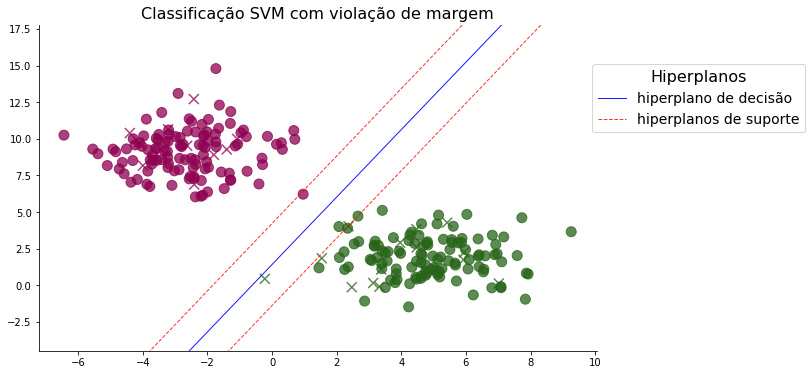

In [ ]:
test_classification(cluster_std=1.5, 
                    title = 'Classificação SVM com violação de margem')

SVC Accuracy:  0.96


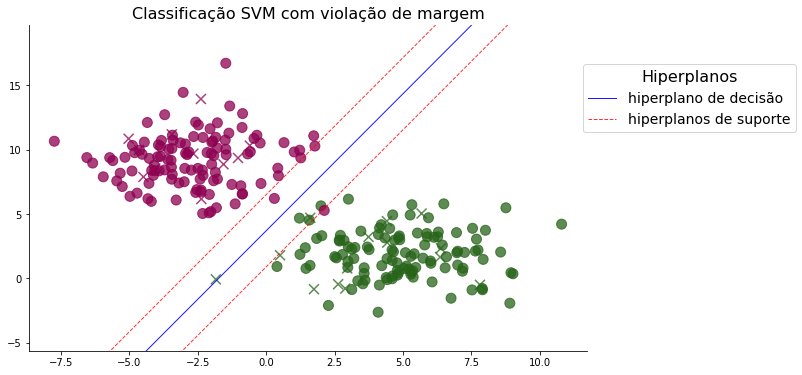

In [ ]:
test_classification(cluster_std=2, 
                    title = 'Classificação SVM com violação de margem')

SVC Accuracy:  0.92


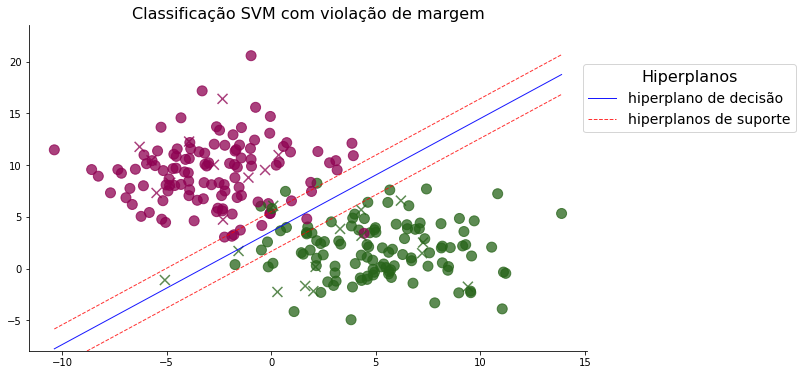

In [ ]:
test_classification(cluster_std=3, 
                    title = 'Classificação SVM com violação de margem')